In [ ]:
#quran data filrting 

In [17]:
pip install pydub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [103]:
#Importing audio processing libreis 
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import noisereduce as nr
import soundfile as sf
from pydub import AudioSegment, silence
import librosa
import soundfile as sf
import numpy as np


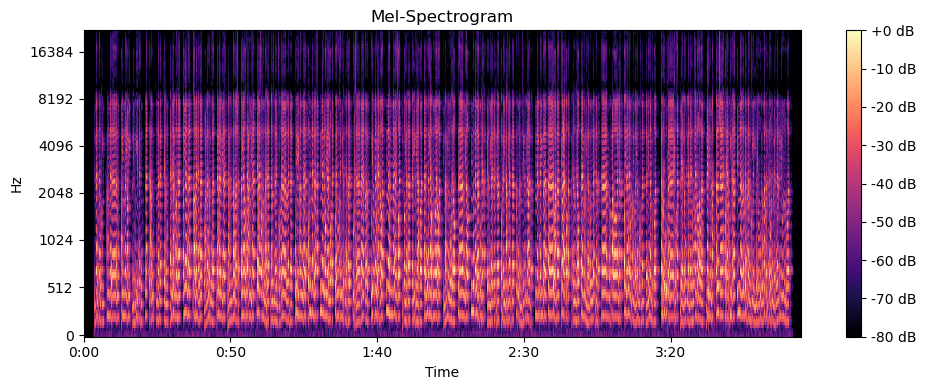

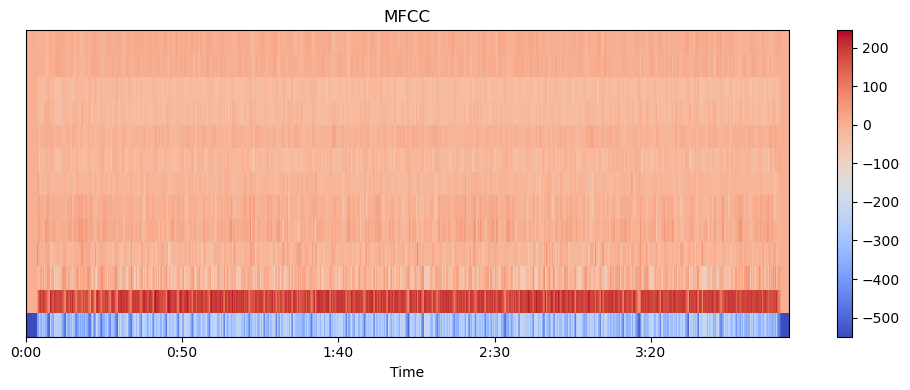

In [104]:

# 1. Load the audio file (MP3)
audio_path = 'Surat/078.mp3'  # Replace with your file path
y, sr = librosa.load(audio_path, sr=None)  # sr=None preserves the original sampling rate

# 2. Compute Mel-Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to decibels for better visualization
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Display the Mel-Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()

# 3. Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [105]:
#Noise Reduction

# Load the original audio file
audio_path = 'Surat/078.mp3'  # Replace with your file path
y, sr = librosa.load(audio_path, sr=None)   # Load audio with original sampling rate

# Apply noise reduction
# Assume the first second is mostly background noise (adjust based on your audio)
noise_sample = y[:int(sr)]  # Take the first 1 second as the noise sample
y_denoised = nr.reduce_noise(y=y, sr=sr, y_noise=noise_sample)

# Save the denoised audio as a new file to avoid overwriting
new_audio_path = 'Processed/audio1.mp3'  # Choose a new name
sf.write(new_audio_path, y_denoised, sr)

print(f"Denoised audio saved as: {new_audio_path}")




Denoised audio saved as: Processed/audio1.mp3


In [106]:
#Delete scilence sounds between words in audio

y, sr = librosa.load(new_audio_path, sr=None)

# Convert librosa audio to pydub format
audio_segment = AudioSegment(
    y.tobytes(), 
    frame_rate=sr,
    sample_width=y.dtype.itemsize, 
    channels=1
)

nonsilent_segments = silence.detect_nonsilent(audio_segment, min_silence_len=200, silence_thresh=-20)
print(nonsilent_segments)
# Detect silent segments (adjust silence thresholds as needed)
nonsilent_audio_segments = []

# Loop through each start and end time in nonsilent_segments
for start, end in nonsilent_segments:
    # Convert start and end times from milliseconds to sample indices
    start_sample = int(start * sr / 1000)
    end_sample = int(end * sr / 1000)
    
    # Extract the audio segment and append it to the list
    nonsilent_audio_segments.append(y[start_sample:end_sample])

# Concatenate all nonsilent segments into a single array
processed_audio = np.concatenate(nonsilent_audio_segments)

# Save the processed audio
new_audio_path = 'Processed/audio2.mp3'

sf.write(new_audio_path, processed_audio, sr)

y, sr = librosa.load(new_audio_path, sr=None)

audio_segment = AudioSegment(
    y.tobytes(), 
    frame_rate=sr,
    sample_width=y.dtype.itemsize, 
    channels=1
)


[[3533, 7279], [7494, 12165], [12485, 20067], [20343, 21882], [22158, 24116], [24524, 26428], [26696, 26950], [27163, 28766], [29015, 32998], [33357, 33532], [33841, 36655], [36943, 38784], [38995, 40586], [41085, 44452], [45217, 48397], [48783, 50448], [50724, 53177], [53419, 58258], [58526, 63287], [63601, 69869], [70093, 71019], [71791, 77445], [77696, 84850], [85507, 88756], [88984, 90858], [91553, 97024], [97735, 102091], [102445, 104874], [105216, 108061], [108493, 115191], [115811, 121500], [122037, 122192], [122442, 131401], [131708, 141497], [141734, 148654], [148972, 152586], [153453, 153866], [154274, 157797], [158101, 165204], [165966, 168795], [169345, 175561], [175967, 183214], [184000, 195284], [195611, 195884], [196486, 202675], [203153, 211179], [211794, 222046], [222282, 241362]]


In [128]:
import librosa
import numpy as np
import soundfile as sf


# Detect silent segments (example only, adjust parameters as needed)
# You would need to implement silence detection or use a different method here
# Let's assume `split_points` is a list of timestamps where we want to split

nonsilent_segments = silence.detect_silence(audio_segment, min_silence_len=60, silence_thresh=-40)

silence_durations = [end - start for start, end in nonsilent_segments]

average_silence_duration = np.mean(silence_durations)

split_points = []

for start, end in nonsilent_segments:
    split_points.append(start)


# Loop over each split point and save segments as .wav files
for i in range(1, len(split_points)):
    start_sample = int(split_points[i - 1] * sr / 1000)  # Convert ms to sample index
    end_sample = int(split_points[i] * sr / 1000)
    segment = y[start_sample:end_sample]
    
    # Define output path
    output_path = f'Processed/AlnabaSegments3/segment_{i}.mp3'
    
    # Save the segment as a WAV file
    
    sf.write(output_path, segment, sr)
    
    print(f'Saved {output_path}')


Saved Processed/AlnabaSegments3/segment_1.mp3
Saved Processed/AlnabaSegments3/segment_2.mp3
Saved Processed/AlnabaSegments3/segment_3.mp3
Saved Processed/AlnabaSegments3/segment_4.mp3
Saved Processed/AlnabaSegments3/segment_5.mp3
Saved Processed/AlnabaSegments3/segment_6.mp3
Saved Processed/AlnabaSegments3/segment_7.mp3
Saved Processed/AlnabaSegments3/segment_8.mp3
Saved Processed/AlnabaSegments3/segment_9.mp3
Saved Processed/AlnabaSegments3/segment_10.mp3
Saved Processed/AlnabaSegments3/segment_11.mp3
Saved Processed/AlnabaSegments3/segment_12.mp3
Saved Processed/AlnabaSegments3/segment_13.mp3
Saved Processed/AlnabaSegments3/segment_14.mp3
Saved Processed/AlnabaSegments3/segment_15.mp3
Saved Processed/AlnabaSegments3/segment_16.mp3
Saved Processed/AlnabaSegments3/segment_17.mp3
Saved Processed/AlnabaSegments3/segment_18.mp3
Saved Processed/AlnabaSegments3/segment_19.mp3
Saved Processed/AlnabaSegments3/segment_20.mp3
Saved Processed/AlnabaSegments3/segment_21.mp3
Saved Processed/Alnaba

In [127]:
nonsilent_segments = silence.detect_silence(audio_segment, min_silence_len=60, silence_thresh=-40)

silence_durations = [end - start for start, end in nonsilent_segments]

average_silence_duration = np.mean(silence_durations)

print(nonsilent_segments)
print(silence_durations)
print(average_silence_duration)
print(len(nonsilent_segments))

[[3565, 3658], [3839, 3945], [8450, 8517], [8568, 8712], [9900, 10006], [11950, 12095], [16091, 16170], [17253, 17437], [19970, 20063], [29962, 30068], [33462, 33568], [40293, 40360], [41469, 41561], [43924, 44082], [46393, 46499], [47451, 47517], [49319, 49398], [53720, 53826], [65423, 65503], [65554, 65672], [67382, 67488], [68871, 69042], [69302, 69473], [76212, 76291], [83056, 83122], [88946, 89091], [89155, 89248], [90827, 90894], [93910, 94054], [96874, 97046], [97306, 97398], [104672, 104752], [110850, 111008], [111124, 111243], [111555, 111635], [113998, 114077], [120842, 120961], [125857, 125924], [130272, 130365], [130481, 130600], [133877, 133957], [139715, 139834], [144078, 144223], [145854, 145921], [148545, 148650], [153586, 153666], [158445, 158616], [158746, 158812], [166373, 166466], [170070, 170228], [170540, 170698], [174328, 174472], [174641, 174773], [180871, 180938], [182648, 182819], [183457, 183537], [186070, 186162], [189113, 189179], [192287, 192406], [192587,

In [76]:
from pydub import AudioSegment, silence

# Set parameters for silence detection
min_silence_len = 600  # Only consider silence of 600 ms or longer as split points
silence_thresh = -40   # Silence threshold (in dB)

# Detect silent segments with a minimum length of 600 ms
silent_segments = silence.detect_nonsilent(audio_segment, min_silence_len=500, silence_thresh=-40)

# Prepare split points (adding start and end points)
split_points = [0] + [end for start, end in silent_segments] + [len(audio_segment)]

# Split the audio based on the detected silent segments and save each as a separate mp3 file
for i in range(1, len(split_points)):
    # Define the start and end times of each segment
    start_time = split_points[i - 1]
    end_time = split_points[i]
    
    # Extract the segment
    audio_chunk = audio_segment[start_time:end_time]
    
    # Export the segment to a new mp3 file
    output_path = f'Processed/AlnabaSegments/audio{i}.mp3'
    audio_chunk.export(output_path, format="mp3")
    print(f'Saved {output_path}')


FileNotFoundError: [WinError 2] The system cannot find the file specified

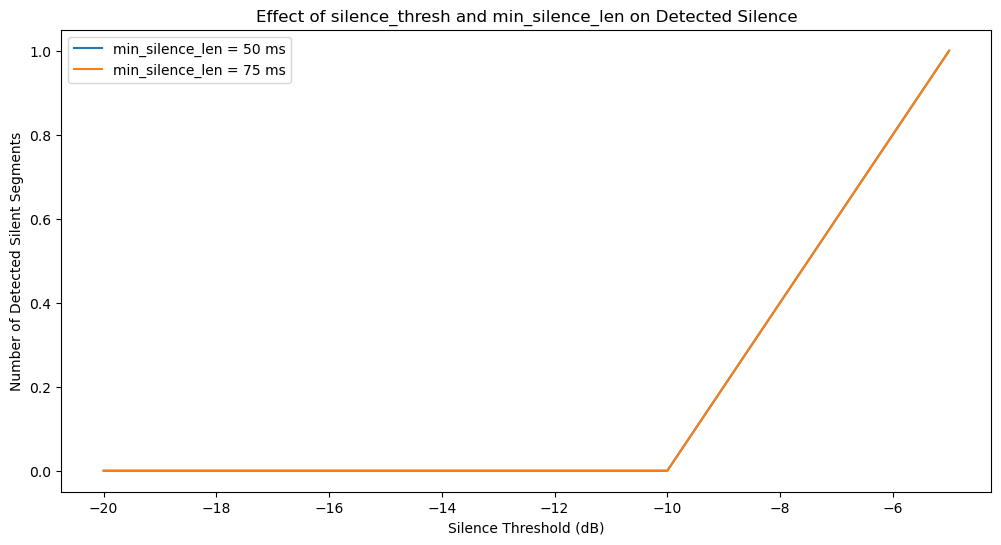

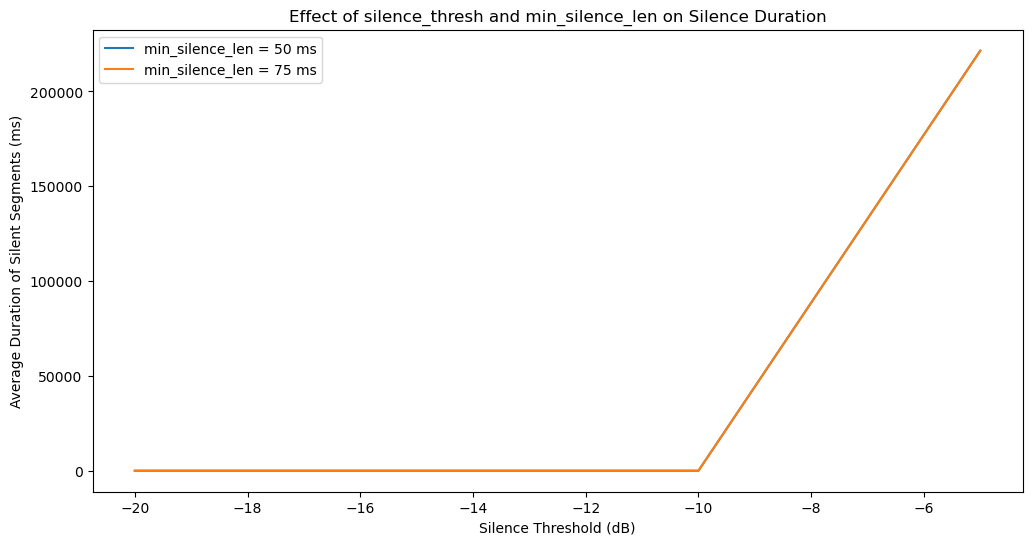

In [28]:
# Loop through combinations of parameters


# Define parameter ranges
silence_thresh_values = np.arange(-5, -1, 5)  # Vary from -60 to -20 dB
min_silence_len_values = np.arange(50, 100, 25)  # Vary from 50 to 500 ms

# Initialize lists to store results
results = []

for silence_thresh in silence_thresh_values:
    for min_silence_len in min_silence_len_values:
        # Detect silence segments
        silent_segments = silence.detect_silence(audio_segment, min_silence_len=min_silence_len, silence_thresh=silence_thresh)
        
        # Calculate number and average duration of silence segments
        num_segments = len(silent_segments)
        if num_segments > 0:
            avg_silence_duration = np.mean([end - start for start, end in silent_segments])
        else:
            avg_silence_duration = 0
        
        # Store results
        results.append((silence_thresh, min_silence_len, num_segments, avg_silence_duration))

# Convert results to a structured array for easier plotting
results = np.array(results, dtype=[('silence_thresh', float), ('min_silence_len', float), 
                                   ('num_segments', int), ('avg_silence_duration', float)])

# Plot the number of detected segments for different silence thresholds and lengths
plt.figure(figsize=(12, 6))
for min_silence_len in min_silence_len_values:
    subset = results[results['min_silence_len'] == min_silence_len]
    plt.plot(subset['silence_thresh'], subset['num_segments'], label=f'min_silence_len = {min_silence_len} ms')
plt.xlabel('Silence Threshold (dB)')
plt.ylabel('Number of Detected Silent Segments')
plt.title('Effect of silence_thresh and min_silence_len on Detected Silence')
plt.legend()
plt.show()

# Plot the average silence duration for different silence thresholds and lengths
plt.figure(figsize=(12, 6))
for min_silence_len in min_silence_len_values:
    subset = results[results['min_silence_len'] == min_silence_len]
    plt.plot(subset['silence_thresh'], subset['avg_silence_duration'], label=f'min_silence_len = {min_silence_len} ms')
plt.xlabel('Silence Threshold (dB)')
plt.ylabel('Average Duration of Silent Segments (ms)')
plt.title('Effect of silence_thresh and min_silence_len on Silence Duration')
plt.legend()
plt.show()

In [67]:
from pydub import AudioSegment
import os

# Manually set FFmpeg path (replace with the path to your FFmpeg 'bin' folder)
AudioSegment.ffmpeg = "C:/ffmpeg/bin/ffmpeg.exe"  # Adjust path as necessary
